In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
df.shape[0]

94380

In [3]:
df.head()

,Fuel_consumption,Accelerator_Pedal_value,Throttle_position_signal,Short_Term_Fuel_Trim_Bank1,Intake_air_pressure,Filtered_Accelerator_Pedal_value,Absolute_throttle_position,Engine_soacking_time,Inhibition_of_engine_fuel_cut_off,Engine_in_fuel_cut_off,...,Acceleration_speed_-_Longitudinal,Indication_of_brake_switch_ON/OFF,Master_cylinder_pressure,Calculated_road_gradient,Acceleration_speed_-_Lateral,Steering_wheel_speed,Steering_wheel_angle,Time(s),Class,PathOrder
0,268.8,0.0,5.2,0.0,33,0,13.3,3,0,0,...,-8.5,1,325.5,0.0,-8.8,0,-3.4,1,A,1
1,243.2,0.0,6.1,0.0,40,0,13.7,3,0,0,...,0.1,1,0.9,0.0,-0.2,0,-3.6,2,A,1
2,217.6,0.0,5.2,0.0,41,0,13.7,3,0,0,...,0.1,1,0.9,0.0,-0.2,0,-3.6,3,A,1
3,204.8,0.0,4.7,0.0,38,0,13.3,3,0,0,...,0.1,1,0.9,0.0,-0.2,0,-3.6,4,A,1
4,217.6,0.0,5.7,0.0,40,0,13.7,3,0,0,...,0.1,1,0.9,0.0,-0.2,0,-3.5,5,A,1


In [4]:
df['Class'].unique()

array(['A', 'D', 'B', 'C', 'I', 'J', 'H', 'G', 'F', 'E'], dtype=object)

In [5]:
change_data_points = df['Time(s)'].diff() - 1
change_data_points = change_data_points[change_data_points!=0.0]
change_data_points

0           NaN
1656    -1656.0
3380    -1724.0
5612    -2232.0
7720    -2108.0
9616    -1896.0
11544   -1928.0
13768   -2224.0
15788   -2020.0
18340   -2552.0
19880   -1540.0
22044   -2164.0
23500   -1456.0
25668   -2168.0
27216   -1548.0
30088   -2872.0
31884   -1796.0
33604   -1720.0
36536   -2932.0
39456   -2920.0
42232   -2776.0
43868   -1636.0
45908   -2040.0
48240   -2332.0
50216   -1976.0
52664   -2448.0
54784   -2120.0
57304   -2520.0
59244   -1940.0
61280   -2036.0
64132   -2852.0
66440   -2308.0
68520   -2080.0
70620   -2100.0
72564   -1944.0
74544   -1980.0
77176   -2632.0
79292   -2116.0
81128   -1836.0
82844   -1716.0
84820   -1976.0
86848   -2028.0
88864   -2016.0
91812   -2948.0
Name: Time(s), dtype: float64

In [6]:
change_data_points.index.shape[0]

44

In [9]:
def show_data(df):
    
    change_data_points = df['Time(s)'].diff() - 1
    change_data_points = change_data_points[change_data_points!=0.0]
    
    part_num = change_data_points.index.shape[0]
    
    for i in range(part_num-1):
        start = change_data_points.index[i]
        end = change_data_points.index[i+1]
        data_part = df[start:end]
        
        plt.figure()
        plt.subplots_adjust(wspace=0.4, hspace=0.6)
        plt.subplot(411)
        data_part['Steering_wheel_angle'].plot()
        plt.grid()
        plt.title("Class : " + data_part['Class'].unique())
        plt.ylabel('Steer angle')
        plt.subplot(412)
        data_part['Absolute_throttle_position'].plot()
        data_part['Master_cylinder_pressure'].plot()
        plt.grid()
        plt.ylabel('Pedal')
        plt.subplot(413)
        data_part['Acceleration_speed_-_Longitudinal'].plot()
        data_part['Acceleration_speed_-_Lateral'].plot()
        plt.grid()
        plt.ylabel('Accelerarion')
        plt.subplot(414)
        data_part['Vehicle_speed'].plot()
        plt.grid()
        plt.ylabel('Velocity')
        plt.hold('off')
        plt.savefig(str(i) + ".png", facecolor="azure")

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:910: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python2.7/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarnin

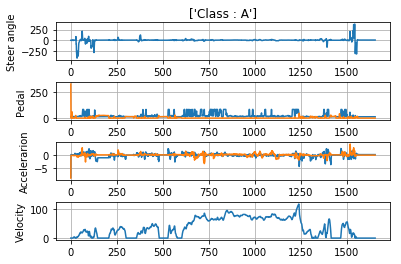

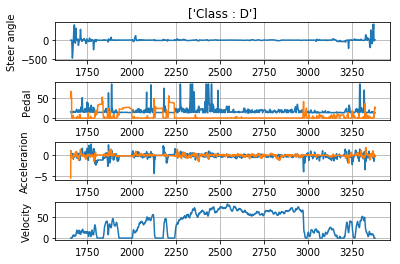

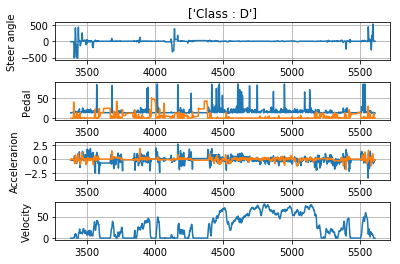

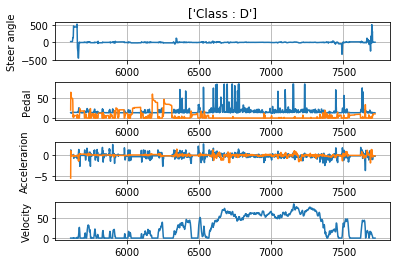

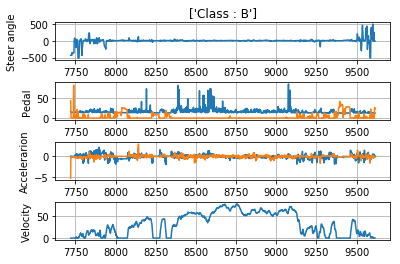

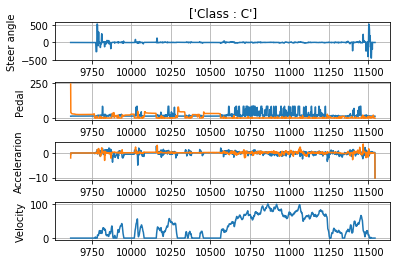

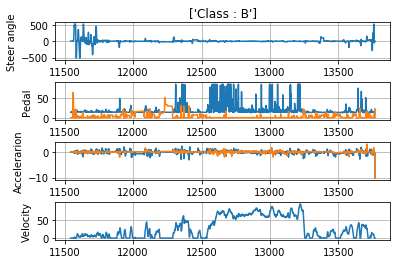

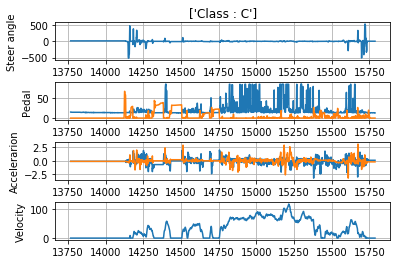

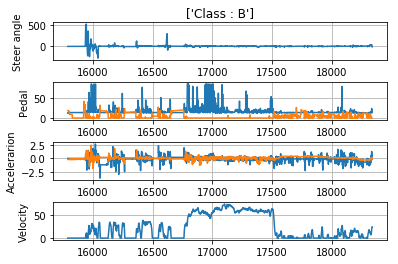

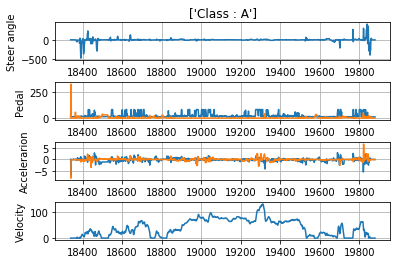

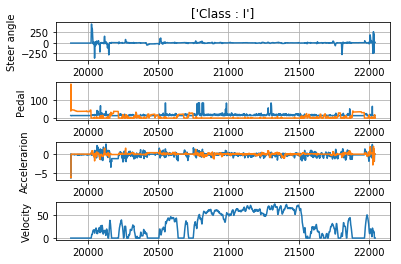

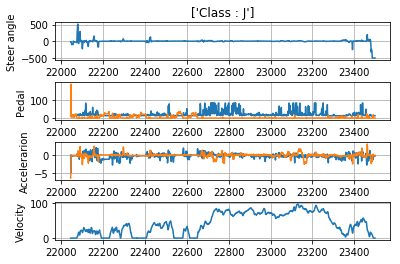

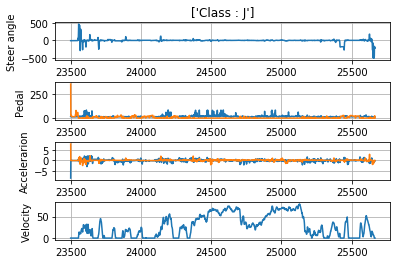

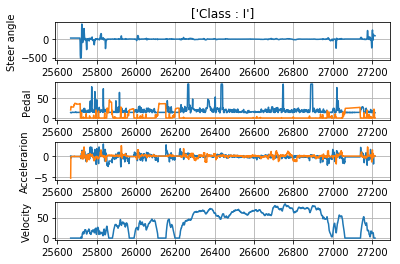

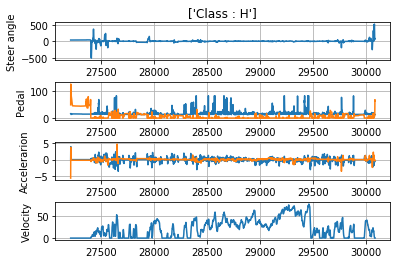

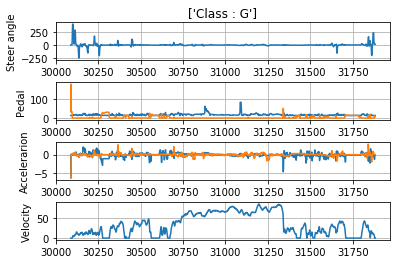

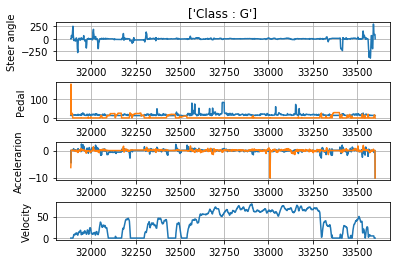

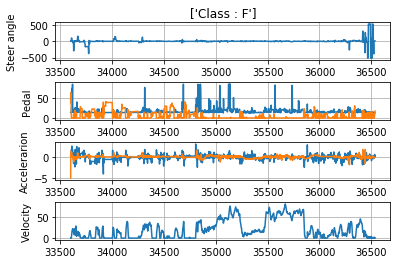

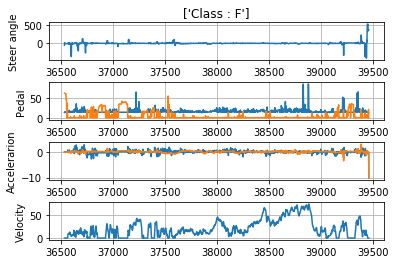

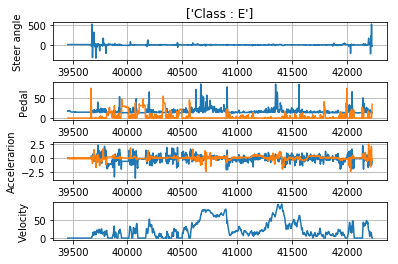

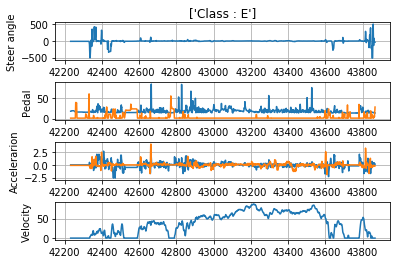

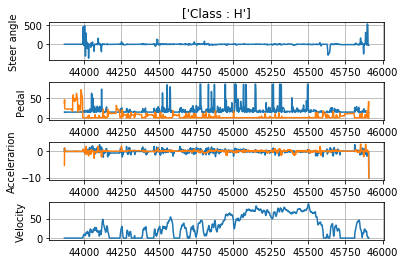

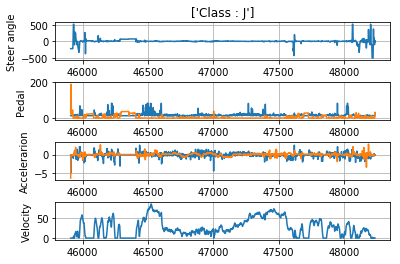

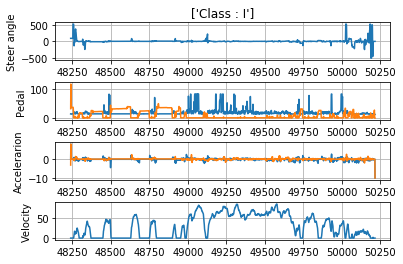

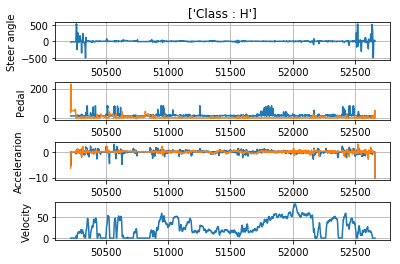

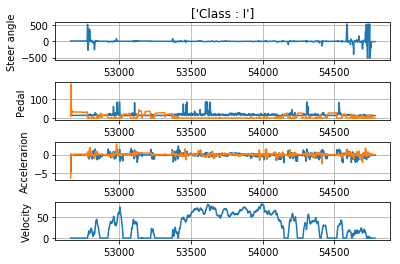

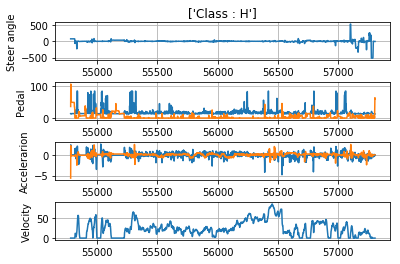

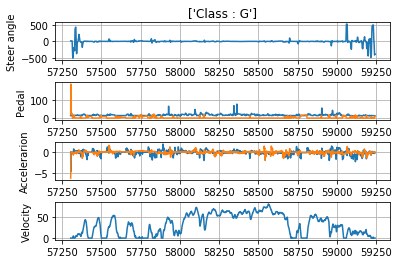

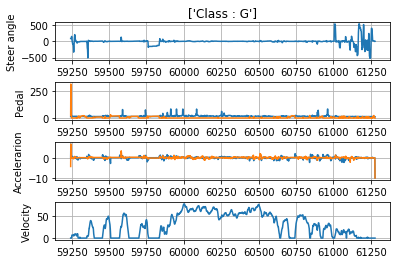

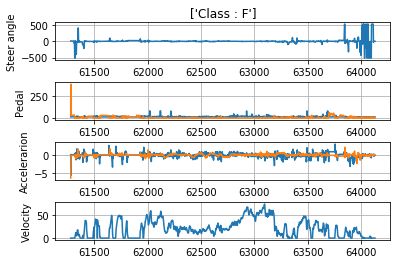

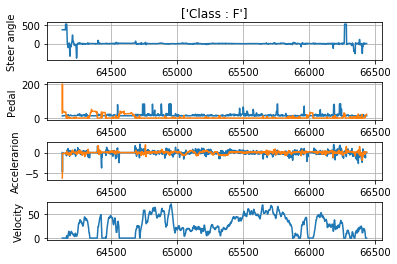

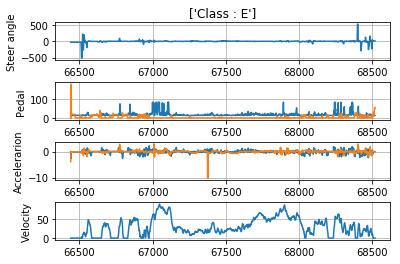

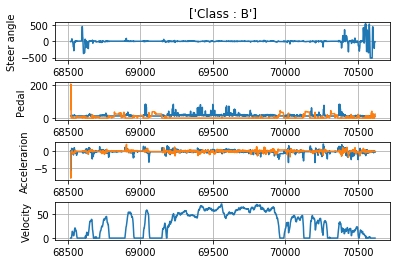

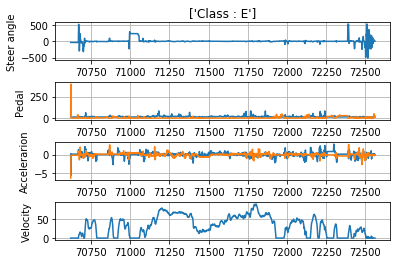

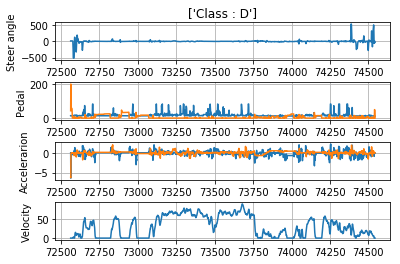

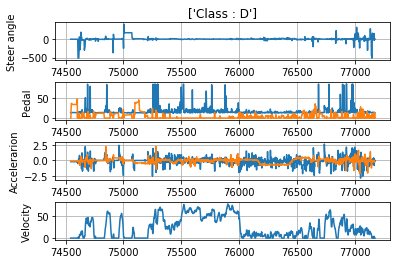

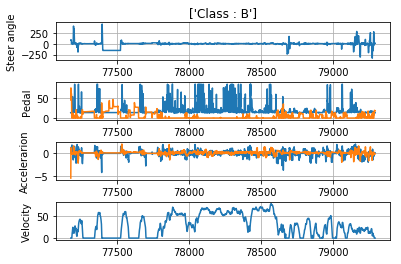

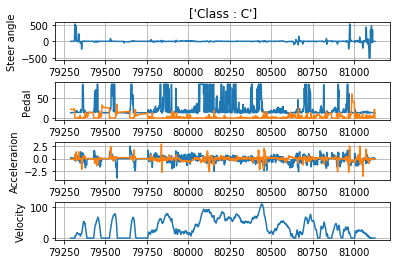

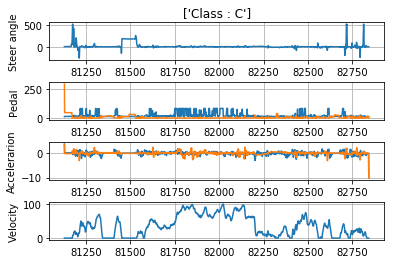

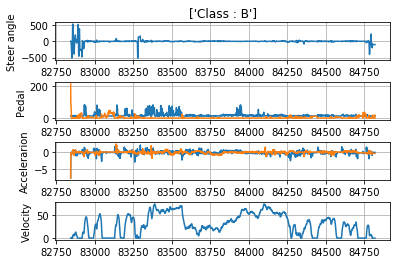

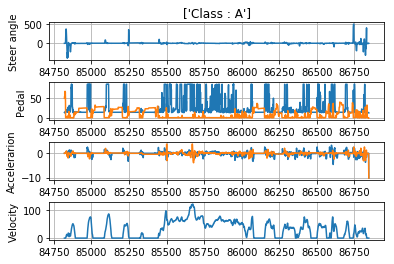

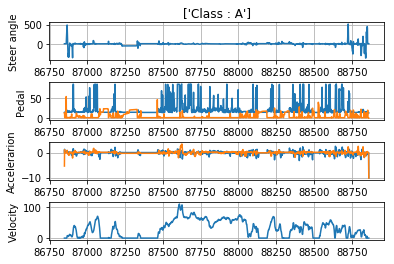

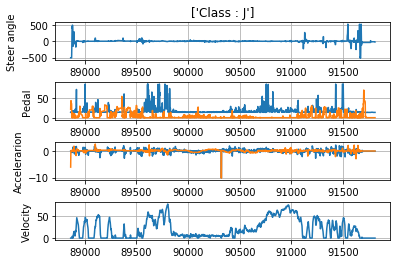

In [10]:
show_data(df)